<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/beginner_credit_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [14]:
holdingData = pd.read_csv("https://raw.githubusercontent.com/benvictoria21/MachineLearning/master/dataset/BankChurners.csv",index_col='CLIENTNUM')
creditData = holdingData.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)
print(creditData.head())
print(creditData.columns)
print(creditData.describe())

              Attrition_Flag  ...  Avg_Utilization_Ratio
CLIENTNUM                     ...                       
768805383  Existing Customer  ...                  0.061
818770008  Existing Customer  ...                  0.105
713982108  Existing Customer  ...                  0.000
769911858  Existing Customer  ...                  0.760
709106358  Existing Customer  ...                  0.000

[5 rows x 20 columns]
Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
       Customer_Age  ...  Avg_Utilization_Ratio
count  10127.000000  ...           10127.000000
mean      46.3259

In [15]:
missing_values_count = creditData.isnull().sum()
print(missing_values_count)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

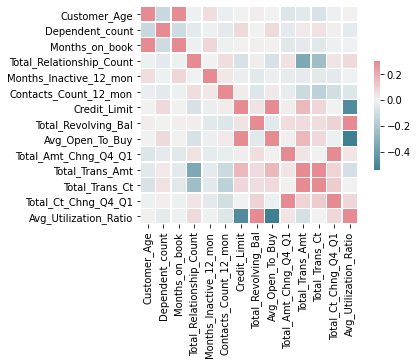

In [17]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(creditData.corr(), vmax=.3, center=0, cmap=cmap,
           square = True, linewidths=.5, cbar_kws={"shrink":.5})

In [18]:
# let's get some train test split going
from sklearn.model_selection import train_test_split

X = creditData.drop("Attrition_Flag",axis=1)
y = creditData.Attrition_Flag

X_train_full, X_test_full, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [19]:
# now we do some pipeline work
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()


In [20]:
# For a future opportunity we could create a new heatmap after 
# converting categorical data to empirical.  Because this is wrapped in 
# a pipeline for train and test we'll skip it.

Random Forest Classifier Success Rate : 96.10%


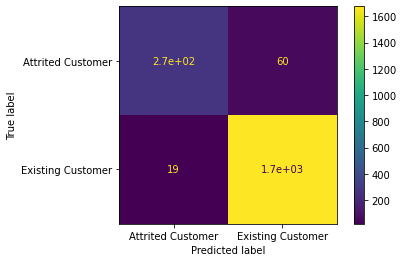

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, plot_confusion_matrix

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_test)

# MAE does not work for classified data so we use accuracy 
preds_score=accuracy_score(y_test,preds)
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*preds_score))
plot_confusion_matrix(clf, X_test, y_test)
plt.show()